In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import tensorflow as tf
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')               
])
model.compile(optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1254 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9848


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0882 - accuracy: 0.9745


[0.08816354721784592, 0.9745000004768372]

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = [np.argmax(i) for i in y_predicted]

Text(33.0, 0.5, 'Actual')

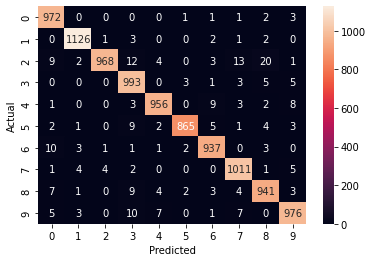

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_predicted)
plt.Figure(figsize=(7,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')